In [165]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

Importing all the necessary librarires

In [166]:
pima_df = pd.read_csv("pima-indians-diabetes+(3).csv")

Reading the data and storing it as a dataframe.

In [167]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [168]:
pima_df.shape

(768, 9)

Analysing the number of rows and coloumns in the data

In [169]:
pima_df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

Cheaking the data types of each attribute

In [170]:
pima_df[~pima_df.applymap(np.isreal).all(1)]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


Checking whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
a number.

In [171]:
print((pima_df[['Plas','Preg','skin','test','mass','pedi','age','Pres']]\
       == 0).sum())

Plas      5
Preg    111
skin    227
test    374
mass     11
pedi      0
age       0
Pres     35
dtype: int64


Checking for "0" in all the attributes. 

In [175]:
pima_df[['Plas','skin','test','mass','Pres']]\
= pima_df[['Plas','skin','test','mass','Pres']].replace(0, pima_df.mean())

Replacing the "0" in the attributes with mean of that particular attribute where "0" value is an error in that attribute.

In [173]:
pima_df.head(20)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


Enssuring the values have been replaced. 

In [174]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Analyszing the distribution of the various attributes

In [148]:
pima_df.groupby(["class"]).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


Analyzing the target column which is 'class' to understand how the data is distributed amongst the various values

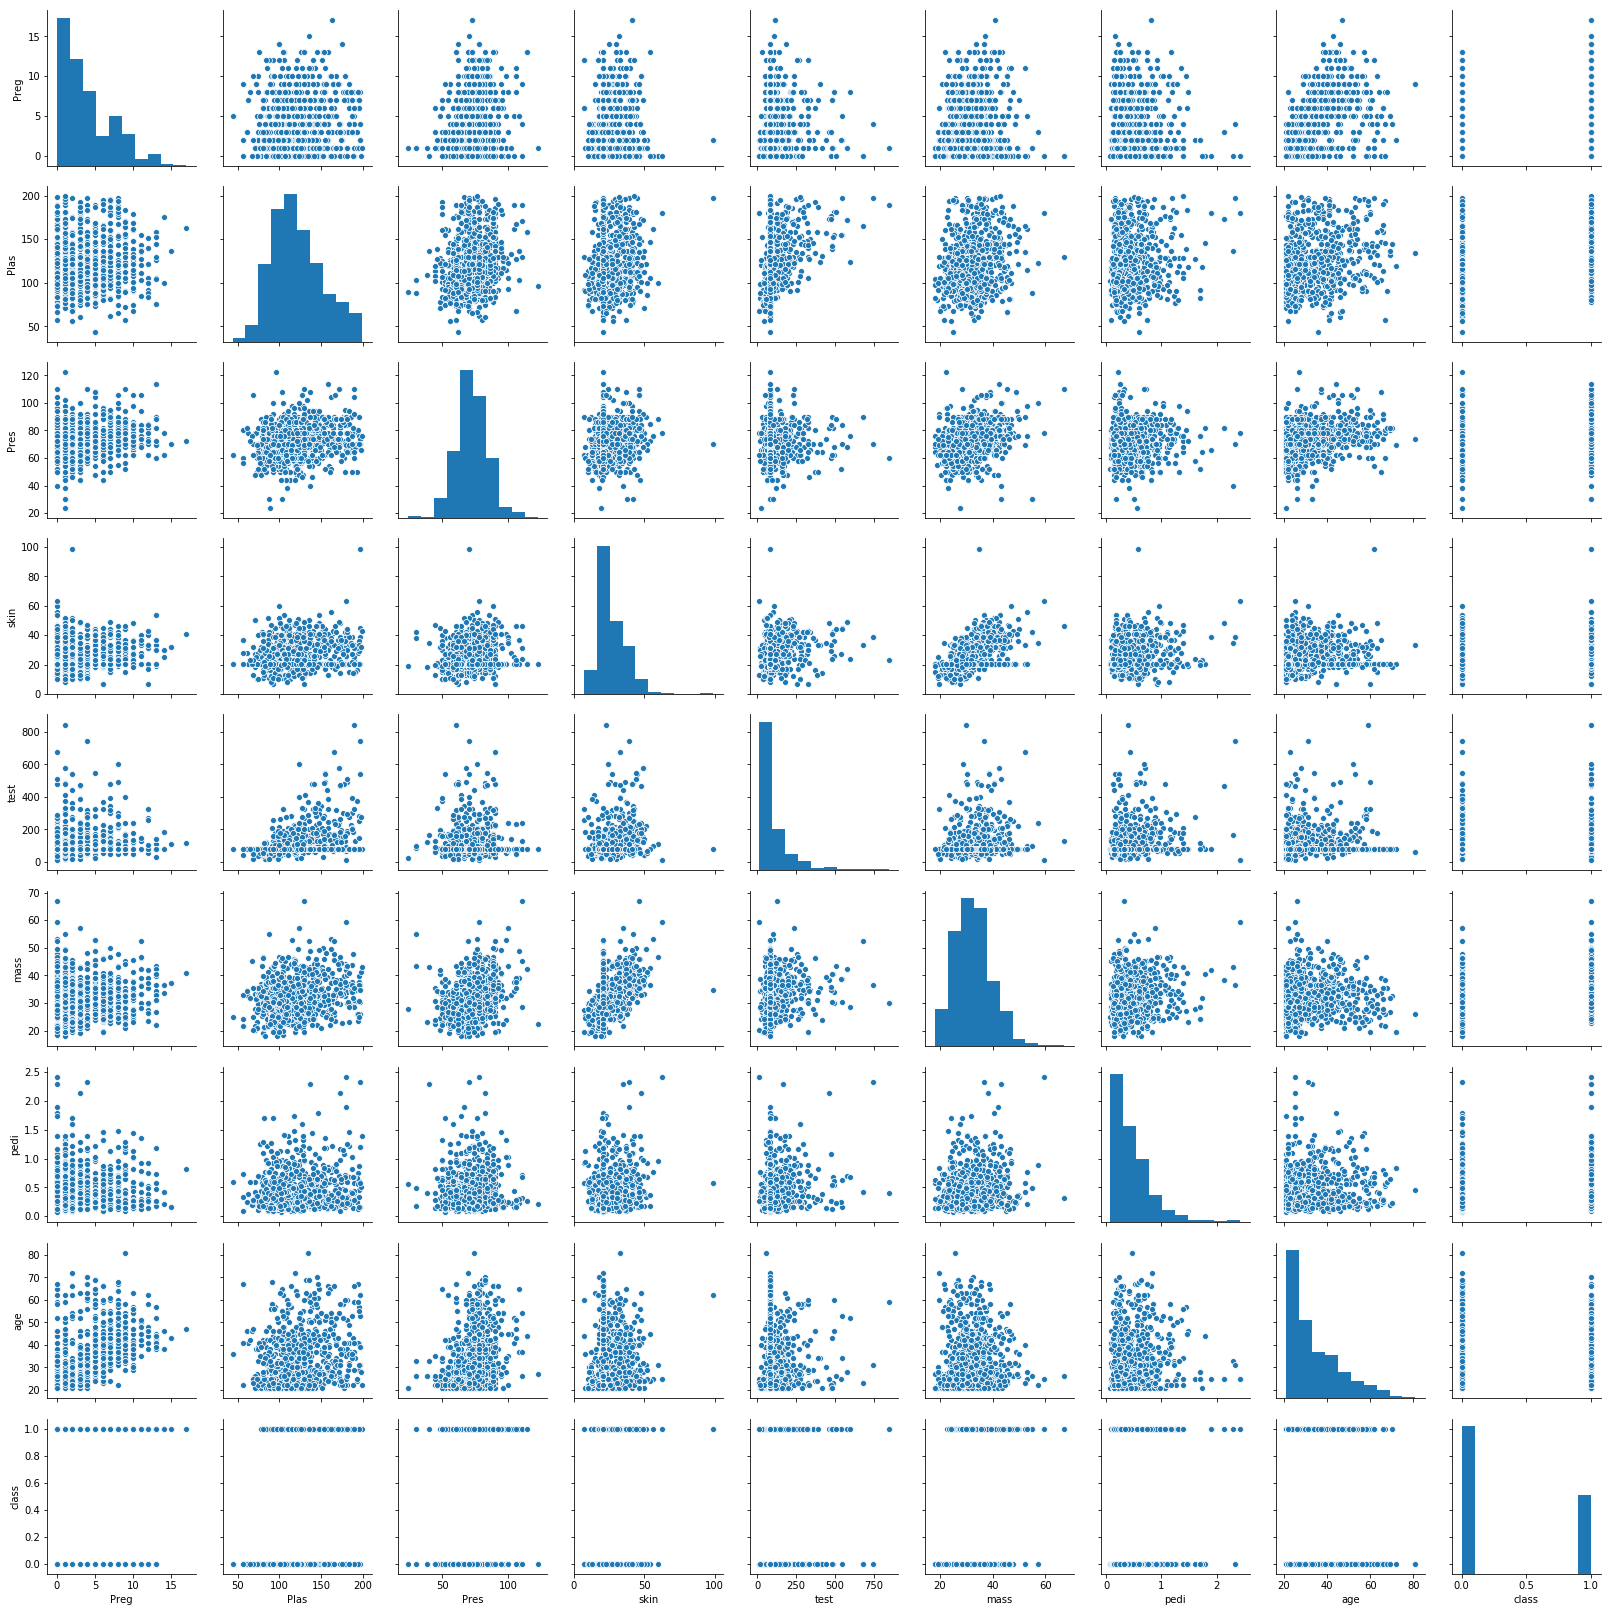

In [149]:
sns.pairplot(pima_df)

Attributes that look normally distributed (plas, pres, skin, and mass).

Some of the attributes look like they  have an exponential distribution (preg, test, pedi, age).

Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

There is no obvious relationship between age and onset of diabetes.

There is no obvious relationship between pedi function and onset of diabetes.


In [150]:
array = pima_df.values
X = pima_df.iloc[:,0:8]
y = pima_df.iloc[:,8]
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)


Splitting the data into training and test data in 30:70 ratio

In [151]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.7705627705627706


Fitting the data on 30% of the data

In [152]:
print(metrics.confusion_matrix(y_test, y_predict))

[[123  23]
 [ 30  55]]


Analyzing the confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 55

True Negatives (TN): we correctly predicted that they don't have diabetes 123

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 23 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 30 Falsely predict negative Type II error

Conclussion:

The Gaussian Navie Bayes alogrithm had a 77.05% accuraccy rate predicting the diabetic and Non-diabetic patients.

It correctly predicted 55 patients those are diabetic and 123 patients who are non-diabetic.

The algorithm made a mistake predicting 23 patients to be diabetic who actullay weren't diabetic and also predicted 30 patients  as non-diabetic but were actually diabetic